""" Inspect the images generated and to be used in training the VAE (and everything else). This includes ensuring they look as they should and that the different rollouts did use different random number generators!!"""

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
round(10.5555,4)

10.5555

In [24]:
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)

In [27]:
import pickle
pickle.dump(observations[0], open('image_array.pkl', 'wb'))
observations[0];

========== ../datasets/carracing/thread0_rollout_0_new.npz ==========
(1000, 96, 96, 3)
255


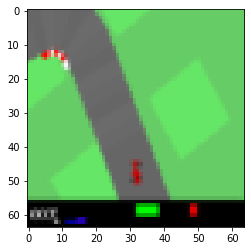

256


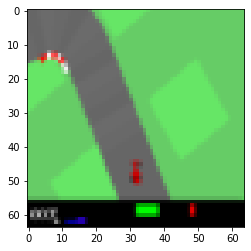

257


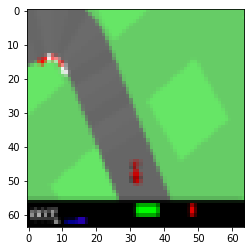

258


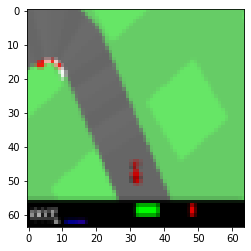

259


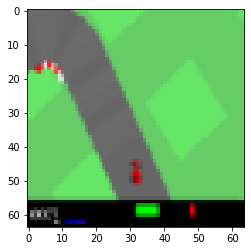

260


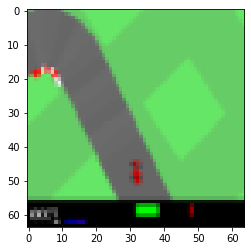

261


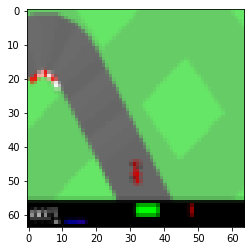

262


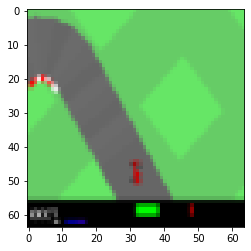

263


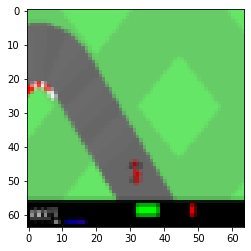

264


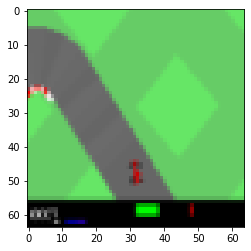

265


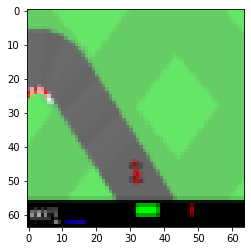

266


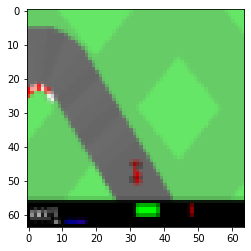

267


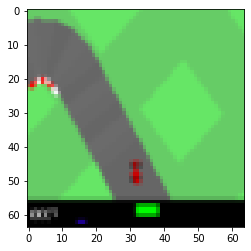

268


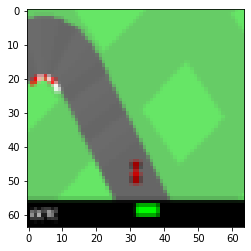

269


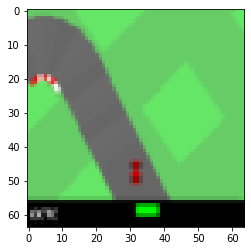

270


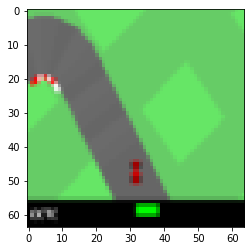

271


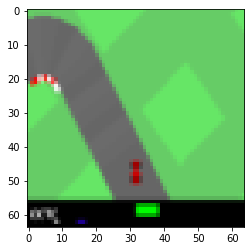

272


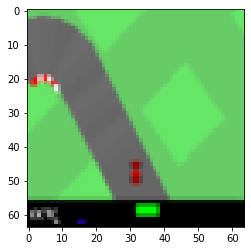

273


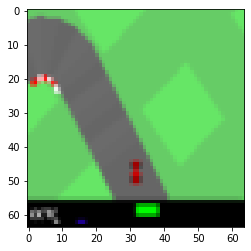

274


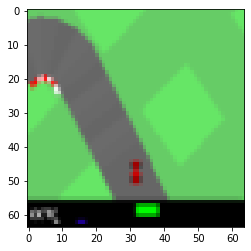

275


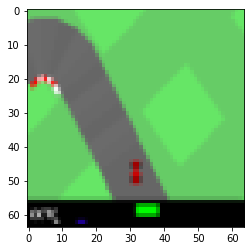

276


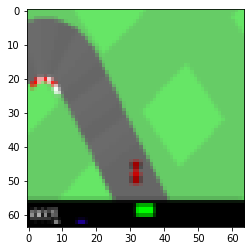

277


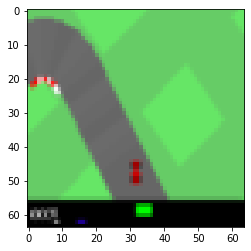

278


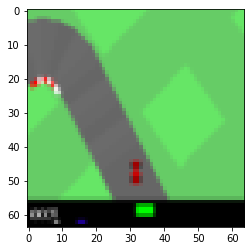

279


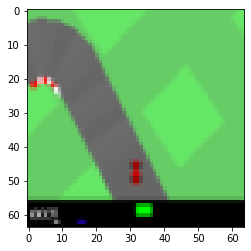

280


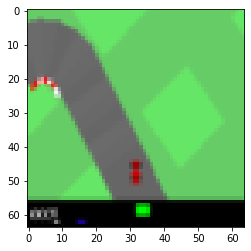

281


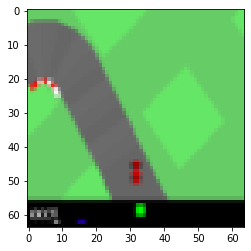

282


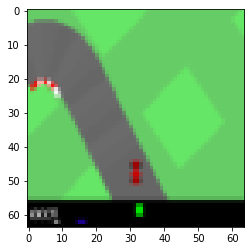

283


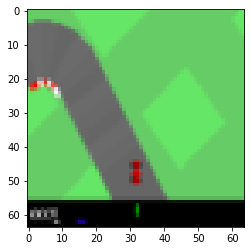

284


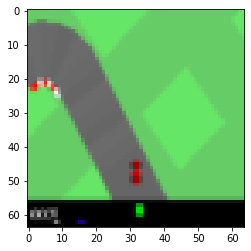

285


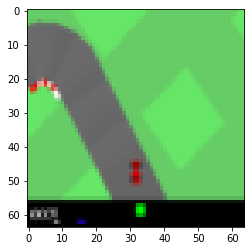

286


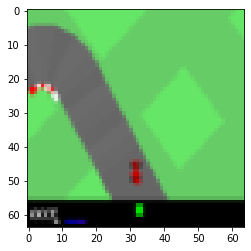

287


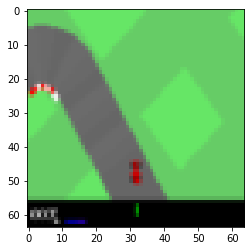

288


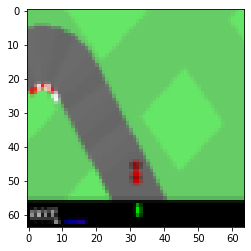

289


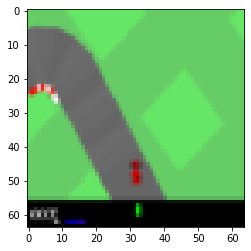

290


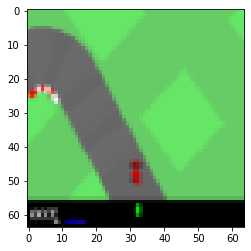

291


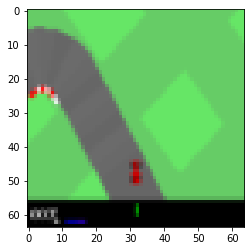

292


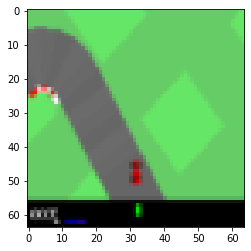

293


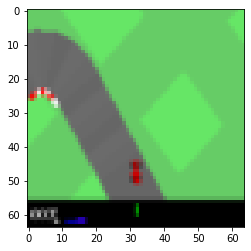

294


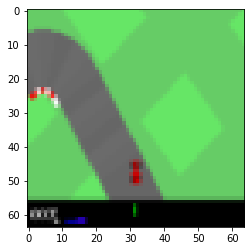

295


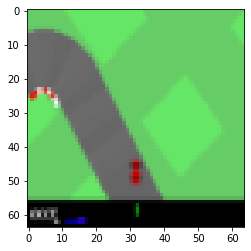

296


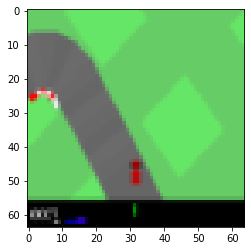

297


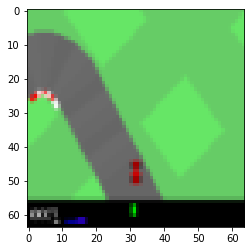

298


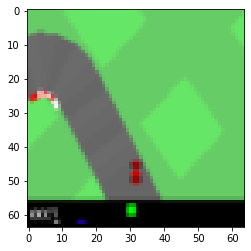

299


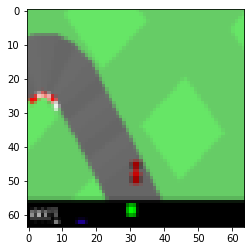

300


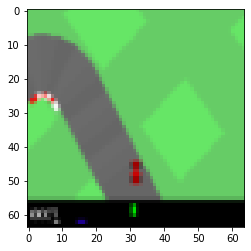

301


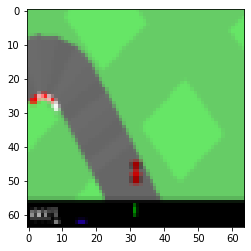

302


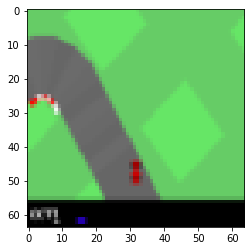

303


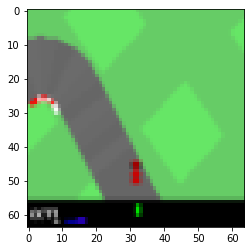

304


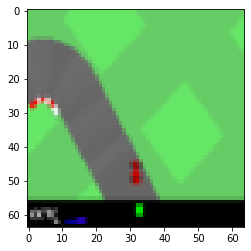

305


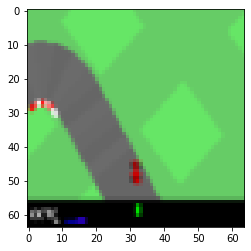

306


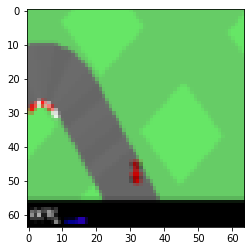

307


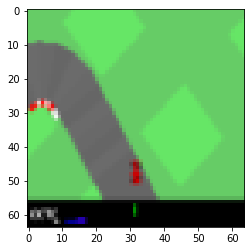

308


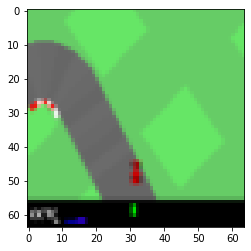

309


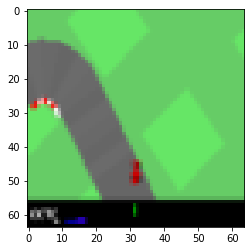

310


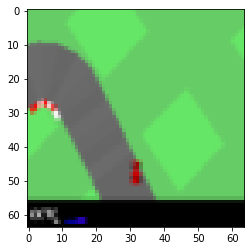

311


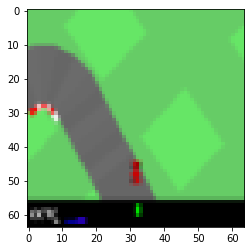

312


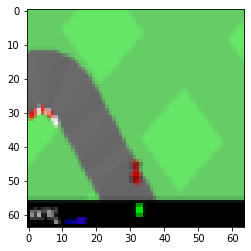

313


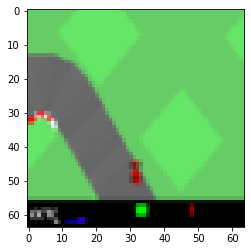

314


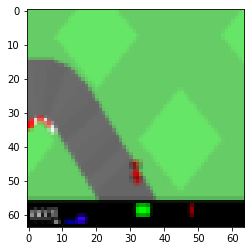

315


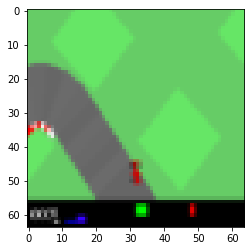

316


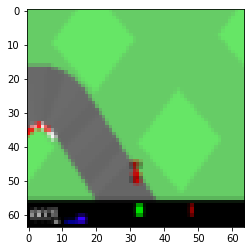

317


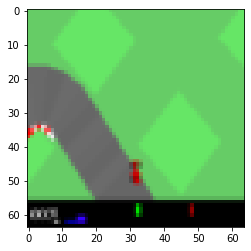

318


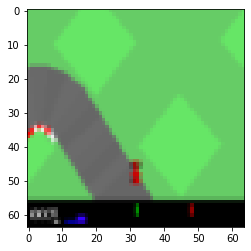

In [19]:
from PIL import Image
from scipy.misc import imresize as resize
for f in files: 
    print('='*10,f,'='*10)
    print('='*20)
    data = np.load(f)
    
    observations = data['observations']
    print(observations.shape)
    
    start=255
    number=64
    for i in range(start, start+number):
        print(i)
        
        frame = Image.fromarray(observations[i], mode='RGB')
        obs = frame.resize((64,64), Image.BILINEAR)
        obs = np.array(obs)/255
        
        plt.figure()
        plt.imshow(obs)
        plt.show()
    

## How does torch behave when resizing them? 

In [48]:

import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

for f in files: 
    print('='*10,f,'='*10)
    print('='*20)
    data = np.load(f)
    
    observations = data['observations']
    print(observations.shape)
    
    start=255
    number=5
    for i in range(start, start+number):
        print(i)
        
        obs = transform(observations[i])
        
        plt.figure()
        plt.imshow(obs.permute(1,2,0))
        plt.show()


========== ../datasets/carracing/thread0_rollout_0_fullsize.npz ==========
(1000, 96, 96, 3)
255


ValueError: pic should be 2/3 dimensional. Got 4 dimensions.

In [46]:
obs.permute(1,2,0).shape

torch.Size([64, 64, 3])

In [44]:
obs.shape

torch.Size([3, 64, 64])

In [51]:
observations[i:i+3].shape

(3, 96, 96, 3)

In [56]:
"testing the mdrnn upscaling abilities. "

transform = transforms.Lambda(
    lambda x: np.transpose(x, (0, 3, 1, 2)) / 255)

In [62]:
import torch.nn.functional as f
tobs = torch.Tensor(transform(observations[i:i+5])).unsqueeze(0)

obs = [
            # reshaping the image why wasnt this part of the normal transform? cant use transform as it is applying it to a batch of seq len!!
            f.upsample(x.view(-1, 3, 96, 96), size=64,
                       mode='bilinear', align_corners=True)
            for x in tobs]


/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [65]:
tobs.shape

torch.Size([1, 5, 3, 96, 96])

In [66]:
len(obs)

1

In [64]:
obs[0].shape

torch.Size([5, 3, 64, 64])

In [67]:
obs = obs[0]

In [68]:
obs.shape

torch.Size([5, 3, 64, 64])

0


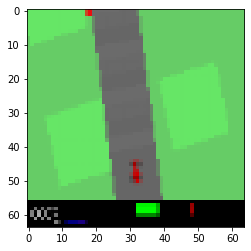

1


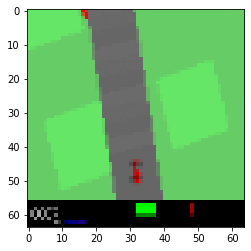

2


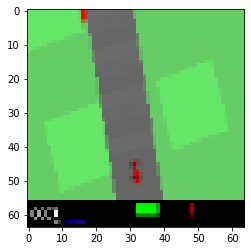

3


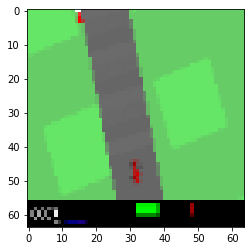

4


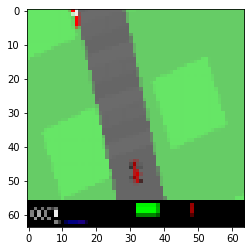

In [69]:
for i in range(5):
        print(i)
        
        plt.figure()
        plt.imshow(obs[i].permute(1,2,0))
        plt.show()

In [ ]:
# nice!